In [3]:
import pickle
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA

path = "/Users/amaros/Desktop/mgss2/log_norm.pkl"

with open(path, 'rb') as file:
        log_norm = pickle.load(file)

mgcst_samples_df = pd.read_csv("../Data/mgCSTs.samples.df.csv")

In [5]:
model = {}

for minclustersize in np.arange(10,51):
    model[minclustersize] = {}
    for deepsplit in np.arange(0,5) :

        print(minclustersize,deepsplit)
        model[minclustersize][deepsplit] = []
        mgcst_sample = mgcst_samples_df[(mgcst_samples_df['minClusterSize'] == minclustersize) & (mgcst_samples_df['deepSplit'] == deepsplit)]
        df = pd.merge(mgcst_sample, log_norm, on='sampleID', how='inner')
        sampleID = df['sampleID']
        mgCST = df['mgCST']
        df = df.drop(['dtc','mgCST','sampleID','minClusterSize','deepSplit','domTaxa', 'relabund'], axis = 1)

        pca = PCA(n_components=3)
        principal_components = pca.fit_transform(df)
        explained_variance = pca.explained_variance_
        explained_variance_ratio = pca.explained_variance_ratio_
        pca_model = {'principal_components' : principal_components,
                     'explained_var_' : explained_variance,
                     'explained_var_ratio' : explained_variance_ratio,
                     'sampleID' : sampleID,
                     'mgCST' : mgCST}
            
        model[minclustersize][deepsplit].append(pca_model)

with open('pca_model2.pkl', 'wb') as file:
    pickle.dump(model, file)

10 0
10 1
10 2
10 3
10 4
11 0
11 1
11 2
11 3
11 4
12 0
12 1
12 2
12 3
12 4
13 0
13 1
13 2
13 3
13 4
14 0
14 1
14 2
14 3
14 4
15 0
15 1
15 2
15 3
15 4
16 0
16 1
16 2
16 3
16 4
17 0
17 1
17 2
17 3
17 4
18 0
18 1
18 2
18 3
18 4
19 0
19 1
19 2
19 3


<Axes: xlabel='pc1', ylabel='pc2'>

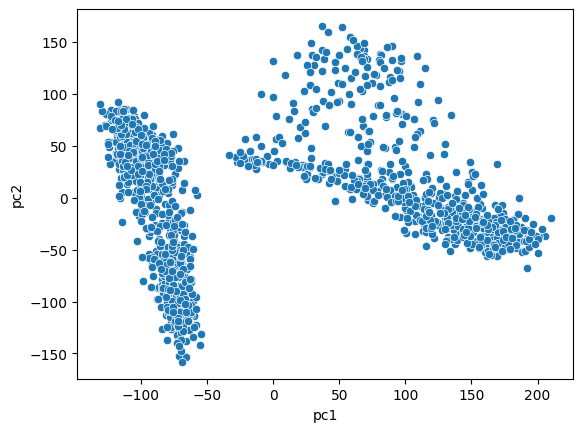

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

path = "Data/pca_model.pkl"

with open(path, 'rb') as file:
        model = pickle.load(file)
        
data = pd.DataFrame(data = model[10][0][0]['principal_components'], columns=['pc1','pc2'])

sns.scatterplot(data=data, x='pc1', y='pc2')

In [8]:
model[10][4][0]['mgCST'].value_counts().sort_index()

mgCST
1      25
2      44
3      83
4       5
5      15
6      51
7      11
8      33
9       3
10      4
11     71
12     88
13     27
14     17
15     52
16     63
17     40
18     18
20      6
21      6
22     35
23    116
24     58
25     28
26     16
27     19
28     78
29     22
30    106
31      9
32     10
34     56
35     23
36     13
37      4
38      4
39      5
40      8
41      9
Name: count, dtype: int64